## Image Analysis

Up to now we have mainly used this session to introduce how to produce visuals of data. This is important but there is also the analysis of images and other multimedia. Next, we talk therefore about a few simple exercises to work with images. We will see that basic image manipulation is actually quite simple because images are matrixes and can be manipulated just like any other matrix. You might remember matrixes from the introductions? If not, it is good to look them up again. They are similar to dataframes but simpler. They contain only one type for all columns. In the case of images, these are pixel values.

First we load our standard libraries again. Run the code and observe that we also load imshow directly. We will use it to display our images.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
%matplotlib inline

Pillow (https://pypi.org/project/Pillow/) is the most commonly used library to process images. Load its image part with `from PIL import Image`.

In [2]:
from PIL import Image

Because we are from Amsterdam, we will work with the famous self-portrait of van Gogh. With PIL's `Image.open()`, we load an image. With requests, we ensure that we can read the image from a URL. Run the code in the next cell.

In [3]:
import requests
Gogh_re = requests.get('https://tinyurl.com/yntmv8z2', stream=True).raw
Gogh = Image.open(Gogh_re)

First, we need to understand what images actually are in the eye of the computer. As said, they are first and foremost matrixes containing pixel values. 

Colour images also include Red-Green-Blue (RGB) information. These RGB channels quantify any colour. Check out https://www.tutorialspoint.com/python_pillow/python_pillow_colors_on_an_image.htm for a detailed explanation and especially the red, green and blue colour coding. A combination of RGB defines any colour for the human eye. This means we need to store all pixels of the image according to its height and width axes and this has to happen three times, because we need one matrix for each RGB colour channel. We need one matrix each for red, green and blue. This leads to a three-dimensional matrix: https://en.wikipedia.org/wiki/Channel_(digital_image).

Let's check it by running:
```
nGogh = np.array(Gogh)
np.shape(nGogh)
```

shape returns the shape of a NumPy array.

In [4]:
nGogh = np.array(Gogh)
np.shape(nGogh)

(768, 608, 3)

As expected, vanGogh is a 3-dimensional NumPy array. It is a 768 by 608 image (first 2 components of the array). The last dimension of this array is the channel with 3 values (1 for red, 2 for green, 3 for blue).

Let's use `imshow(nGogh)` to display this array as the actual image that it is.

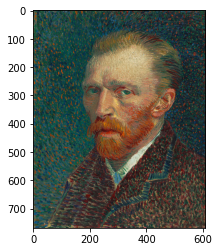

In [5]:
imshow(nGogh)

That’s van Gogh. 

If we handle the image as a NumPy array we can also manipulate it as we would a NumPy array, by for example cropping it. An image crop reduces the width and height. You apply crops often if images are too large to handle. We can easily crop an image in Python by using the fact that it is an array and use slicing. Try: 

```
crop = nGogh[100:400,100:400,:]
np.shape(crop)
```

In [6]:
crop = nGogh[100:400,100:400,:]
np.shape(crop)

(300, 300, 3)

Remember that images are matrixes of pixels! In this case, we cut out everything apart from pixels 100 to 400-1, leading to a 300 by 300 image. We kept all 3 colour channels by using the third comma with an ':'.

Let's take a look at crop with imshow. Do you know how?

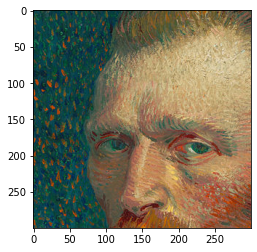

In [7]:
imshow(crop)

Rotation of images is also a fun thing to do. 

The relevant NumPy function is np.rot90(), so let us rotate the master with it. Check out the documentation how and then also display rotated_gogh by running the code below.

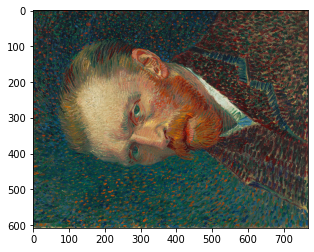

In [8]:
rotated_gogh = np.rot90(nGogh)
imshow(rotated_gogh)

Next we filter out the blue and the green colour channels so that we are left only with the red. This time we want to operate directly on the NumPy array. So, first we make a copy with `red = nGogh.copy()`.

In [9]:
red = nGogh.copy()

How do we eliminate colours? Remember they are channels or the third dimension of our arrays. So, we just have to set green and blue to 0. The red channel is dimension 0. Run `red[:,:,1] = 0 ` to set the green channel to 0.

In [10]:
red[:,:,1] = 0

Can you also set the blue channel to 0? Hint: It is channel 2.

In [11]:
red[:,:,2] = 0 

Please, display red.

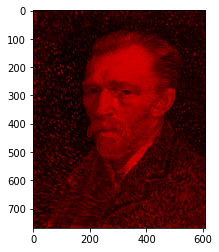

In [12]:
imshow(red)

As an exercise, please create now a green image of vanGogh. You can do this in one piece of code below.

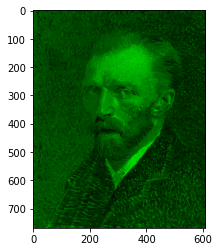

In [13]:
blue = nGogh.copy()
blue[:,:,0] = 0 # set red to zero
blue[:,:,2] = 0 # set blue to zero
imshow(blue)

Finally, we would like to produce a black and white van Gogh. A black and white image consists of a single pixel value for all RGB channels. For each of the channels, we simply need to calculate the average of all three colour channels. First, let us make a copy again with `BW = nGogh.copy()`.

In [14]:
BW = nGogh.copy()

Then, we calculate the average of all three RGB channels and assign it to the first channel, which is the red one. Numpy's mean does the job for us: https://numpy.org/doc/stable/reference/generated/numpy.mean.html. Wit axis=2, we indicate that we want to take the average of the other dimensions. Run `BW = np.mean(BW, axis=2)` to create the average.

In [15]:
BW = np.mean(BW, axis=2)

Run `imshow(BW, cmap = plt.get_cmap('gray'))` to tell Python to display the image in gray-scale mode.

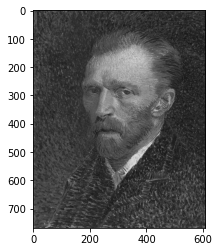

In [16]:
imshow(BW, cmap = plt.get_cmap('gray'))

I think you got the idea that images are pixel matrixes/arrays based on colour channels that you can manipulate like any other matrix of numbers. 

Using this knowledge, you could analyse, for instance, digital images of paintings to find out whether they are by the same artist. Take a look at a Kaggle competition (https://www.kaggle.com/c/painter-by-numbers), which promises to develop an algorithm to detect art forgeries. The algorithm is supposed to assess with certainty that paintings are by van Gogh or not. For the competition, they use images freely available from https://www.wikiart.org/. You could download a few from the site and apply your newly learned skills.